In [24]:
from konlpy.tag import Komoran
tagger = Komoran()  # 형태소 분석기
from urllib.parse import quote_plus
from bs4 import BeautifulSoup
import requests
import lxml.html
import codecs
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import operator

In [27]:
# 미술관옆동물원시나리오 읽어오기
articles = []
fp = codecs.open("2CJ00052.txt_ansi", "r")
soup = BeautifulSoup(fp, "html.parser")
body = soup.select_one("body")
text = body.getText()
articles = text.split("\n")
len(articles)
fp.close()

In [28]:
articles

['',
 'S 1 결혼식장',
 '비디오 카메라의 뷰-파인더로 보여지는 듯한 화면.',
 '신부:제가 원래 남자 얼굴을 좀 밝혔거든요. 호호호호. 첫눈 에 반했어요.',
 '신랑:비가 와서 걱정했는데 흥행이 성공적이라 정말 기쁩니다.',
 '상투적인 주례사가 흐르면서 결혼식 풍경이 보여지는데, 기존의 결혼식 비디오와는 좀 다른 듯한 신선함이 엿보인다. 생생함, 현장감등을 살리면서 의도적인 핸드-헬드, 퀵-줌 등이 구사되며 양각 구도, 포커스-플레이 등등이 다채롭게 펼쳐지는데…카메라, 하객들을 훑다가 갑자기 느린 화면으로 변한다. 시끌법석한 현장음도 레코드판이 멈추는 것처럼 뭉개지며 사라지고 대신, 촬영하는 사람의 긴장된 숨소리와 심장 박동소리만이 느린 화면에 맞춰서 늘어지게 깔린다. 카메라, 천천히 어느 남자 (보좌관)얼굴에서 멈춘다.',
 '그를 향해 줌-인 되자 뭔가 느끼며 카메라를 흘낏 본다. 계속 그의 표정을 잡고 있자 그가 다시 쳐다보고. 그제서야 카메라는 급히 옆으로 피한다. 그의 시선, 카메라를 따라 오는데, 순간 화면 꺼지고. 경쾌한 음악과 함께 블루 모노-톤 위로 쓰여지는 컬러 제목―미술관 옆 동물원―',
 '음악은 다음 장면들에도 계속 흐른다.',
 'S 2 결혼식장 복도',
 '황급히 걸어나오는 금뱃지의 국회의원(주례선 이)과 보좌관들. 그리고 굽실거리는 신랑신부 부모들. 아까 카메라가 주시하던 사람도 옆에서 걷고 있다. 다들 바쁘게 카메라 앞을 지나친다.',
 'S 인서트',
 '컴퓨터 모니터 화면. 시나리오 같은 게 떠있다.',
 '춘희소리:그는 아직도 내 존재를 모른다.',
 '글자 찍히는 속도가 너무 느리다. 다 치기도 전에 화면 바뀐다.',
 'S 3 결혼식장 복도',
 '다른 날이다. 복장이 바뀐 의원과 보좌관들이 여전히 바삐 걸어 나오고 있다.',
 '의원:그쪽에서 난리 났겠군. 시간 좀 늦추지 그랬나?',
 '보좌관:불가능했습니다, 의원님. 그쪽 사정도 있고 해서… 4시엔 또…',
 '의원:그 4시 껀 거절하지 그랬나?',


In [29]:
def get_noun(text):
    nouns = tagger.nouns(text)
    return [n for n in nouns if len(n) > 1]  # 2글자 이상인 명사만 추출

# TF-IDF 행렬구하기
cv = TfidfVectorizer(tokenizer=get_noun, max_features=100)
tdm = cv.fit_transform(articles)

In [30]:
print(tdm.toarray())
print(tdm) 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
  (2, 97)	1.0
  (3, 50)	0.4997234840986905
  (3, 12)	0.5807712614456708
  (3, 77)	0.6426361189032795
  (5, 33)	0.28773556177427
  (5, 36)	0.23886678770406997
  (5, 84)	0.3409434405041063
  (5, 89)	0.5152196852536972
  (5, 50)	0.2698803024702649
  (5, 12)	0.313650906336114
  (5, 97)	0.5542967452725845
  (6, 58)	0.309242127922703
  (6, 44)	0.3264224162022073
  (6, 92)	0.2913199704230759
  (6, 89)	0.7948015474116428
  (6, 97)	0.28502787159031984
  (7, 72)	0.6280407140884099
  (7, 15)	0.5881408924128303
  (7, 58)	0.5095636879911671
  (8, 34)	1.0
  (9, 2)	0.46611571270650565
  (9, 33)	0.39986436952774346
  (9, 36)	0.33195172983635834
  (9, 89)	0.7159976797510841
  (11, 43)	0.7386273741778673
  :	:
  (1291, 43)	0.9368985518591355
  (1292, 85)	1.0
  (1293, 83)	1.0
  (1294, 83)	0.7244466408940508
  (1294, 85)	0.6893308817232304
  (1297, 31)

In [31]:
words = cv.get_feature_names()
count_mat = tdm.sum(axis=0)
count = np.squeeze(np.asarray(count_mat))
word_count = list(zip(words, count))
word_count = sorted(word_count, key=operator.itemgetter(1), reverse=True)
word_count

hot_key = list(dict(word_count[:50]).keys())
hot_key

['춘희',
 '철수',
 '다혜',
 '소리',
 '인공',
 '사람',
 '생각',
 '카메라',
 '미술관',
 '동물원',
 '사랑',
 '얼굴',
 '화면',
 '보좌관',
 '결혼',
 '여자',
 '시나리오',
 '시간',
 '표정',
 '침대',
 '아줌마',
 '그림',
 '친구',
 '자전거',
 '음악',
 '분위기',
 '전화',
 '우산',
 '사이',
 '마음',
 '시선',
 '지금',
 '모습',
 '의원',
 '처음',
 '기분',
 '욕실',
 '하늘',
 '오늘',
 '맥주',
 '남자',
 '내일',
 '이번',
 '밤하늘',
 '이름',
 '흥분',
 '기대',
 '얘기',
 '혼자',
 '책상']

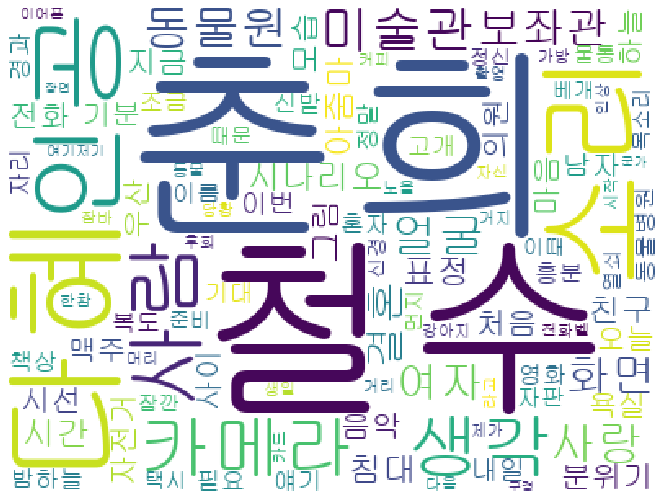

In [32]:
# word cloud
%matplotlib inline
from matplotlib import pyplot
from wordcloud import WordCloud
wc = WordCloud(font_path='C:\\Windows\\Fonts\\NGULIM.ttf', background_color='white', width=400, height=300)
cloud = wc.fit_words(dict(word_count))
pyplot.figure(figsize=(12, 9))
pyplot.imshow(cloud)
pyplot.axis("off")
pyplot.show()

In [33]:
import codecs
from konlpy.tag import Twitter
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

def sigmoid(x):
    return 1 / (1 + math.e ** -x)

# 텍스트를 처리하기
twitter = Twitter()
results = []
lines = articles
words_all = []

for line in lines:
    # 형태소 분석하기
    malist = twitter.pos(line, norm=True, stem=True)
    r = []
    for word in malist:
        # 명사/동사/부사만 걸러내기 
        if word[1] in ['Noun','Verb','Adjective']:
            r.append(word[0])
            words_all.append(word[0])
    rl = (" ".join(r)).strip()
    results.append(rl)
    print(rl)

D:\Users\Yohan\anaconda3\envs\tensorflow_lab\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')



결혼식장
비디오 카메라 뷰 파인더 보이다 듯 화면
신부 제 원래 남자 얼굴 좀 밝히다 호호 호 눈 반했어
신랑 비 오다 걱정 하다 흥행 성공 정말 기쁘다
상투 주례사 흐르다 결혼식 풍경 보이다 기존 결혼식 비디오 좀 다른 듯 신선하다 엿보다 생생하다 현장 감등 살리다 의도 핸드 헬드 퀵 줌 등 구사 되다 양각 구도 포커스 플레이 등등 다채롭 펼쳐지다 카메라 하객 훑다 갑자기 느리다 화면 변하다 끌 법석 장음 레코드 판이 멈추다 것 뭉개지 사라지다 대신 촬영 하다 사람 긴장 되다 숨소리 심장 박동 소리 느리다 화면 맞추다 늘어지다 깔리다 카메라 남자 보좌 관 얼굴 멈추다
그 향 하다 줌 인 되다 뭔가 느끼다 카메라 흘낏 보다 계속 그 표정 잡고 있다 그 다시 쳐다보다 제 서다 카메라 급하다 옆 피 그 시선 카메라 따르다 오다 순간 화면 꺼지다 경쾌하다 음악 블루 모노 톤 위로 쓰이다 컬러 제목 미술관 옆 동물원
음악 다음 장면 계속 흐르다
결혼식장 복도
황 급하다 걸다 나오다 금 뱃지 국회의원 주례 선 이 과 보좌 관 굽실 거리 신랑 신부 부모 아깝다 카메라 주시 하다 사람 옆 걷다 있다 들다 바쁘다 카메라 앞 지나치다
인서트
컴퓨터 모니터 화면 시나리오 같다 게 뜨다
춘희 소리 그 내 존재 모르다
글자 찍히다 속도 느리다 치기 전 화면 바뀌다
결혼식장 복도
다른 날 복장 바뀌다 의원 보좌 관 여전하다 바삐 걸다 나오다 있다
의원 쪽 난리 나다 시간 좀 늦추다 그렇다
보좌 관 불가능하다 의원님 쪽 사정 있다 하다 또
의원 그 껀 거절 하다 그렇다
보좌 관 안되다 의원님 지역구 중요하다 사람 들이다
의원 짜증 생색 안나 일
그 카메라 지나치다 멀어지다 간다
인서트
켜지다 모니터 앞 두다 공책 시나리오 쓰다 손
춘희 소리 오늘 그 나르다 보지 하다
결혼식장 복도
또 다른 날 바삐 걸다 나오다 의원 보좌 관 승강기 타다
닫히다 문 사이 비디오 카메라 들다 춘희 아슬아슬 들어오다
명기 들다 동료 타다
춘희 카메라 들이다 대다 의원님 신랑 신부 개인 덕담 말씀
보좌 관

춘희 발끈 지금 어떻다
철수 이렇다 말 안 하다 하다 지금 껀 당선 가능성 없다
춘희 왜
철수 네 자다 알다 아무 안 좋아하다 것
춘희 왜
철수 답답 재미 없다 섹스 씬 같다 것 없다 끝 없다 거지
춘희 그렇다 게 왜 필요하다
철수 나 차다 사랑 영화 그렇다 게 없다 누가 돈 주다 뽑다 주다 나다 돈 내다 안 보다
춘희 인상 쓰다 골똘
철수 쉬다 생각 하다 식욕 같다 본능
춘희 말문 막히다 그냥 쓰다 대로 쓸다 당선 안되다 법 없다
철수 비아 그렇다 당선 아니다 당첨 겠다 일어서다
철수 차 저녁
찻길 부감 인서트 퇴근길 차 밀리다
철수 네 시나리오 인물 그게 그거 같다 그렇다 건 사건 못 되다
차 빵빵 울리다 대다
철수 손 들다 양해 구 실제 보다 가장 안 어울리다 사람 끼리 연애 하다 때 제일 궁금하다 않다 영화 그렇다 재밌다
춘희 너 오늘 기분 나쁘다 나 트집 잡다
철수 차선 자다 못 들다 깜박이다 켜다 팔 내미다 끼어들다 양해
춘희 어쨌든 난 명 명 사람 취향 챙기다 싶다
철수 화 내다 어쭈 백 미러 차 보다 분개 제 생각 안해 춘희 그렇다 생각 평생 당첨 안 되다
춘희 방 저녁
춘희 식탁 위 사발면 포장 되다 김밥 놓이다 있다 철수 턱 괴고 조용하다 있다
춘희 좀 먹다 두다 사오다 사람 안 먹다 미안하다 응
철수 넌 내 지금 배 고프다 거 생각 하다 넌 연애 하다 보다 적도 없다
춘희 뭔가 대꾸 하다 관 두다 김밥
김밥 우기다 넣다 목 메인 춘희 철수 동시 물통 잡다
서로 양보 않다
철수 넌 물컵 없다
춘희 있다 깨지다
철수 더 꽉 잡다
춘희 손 떼다 아깝다 그냥 마시다 뭐
철수 입 대고 꿀꺽 꿀꺽
춘희 보다 나 오늘 이 안 닦다
시간 경과
텔레비젼 크다 소리 운동경기 한창 춘희 컴퓨터 앞 서툴다 솜씨 자판 있다
철수 캔 맥주 말다 시선 텔레비젼 가다 있다 뭔가 따다 생각 골몰 하다 듯 하다 춘희 이렇다 철수 꽤 신경 쓰이다 말 못 서성대다
춘희 안 가다
철수 여전하다 텔레비젼 시선 두다 여자 말 끝나다 헤어지자 이렇다 말 진짜 하다
춘희 본심 아니다 

두 주먹 망원경 눈 갖 다대고 밤하늘 멍하니 보고 있다 다혜
다혜 독백 보고 싶다 만나다 싶다 그 눈속 비치다 별 되다 싶다
철수 소리 뭐 하다 뭐 하다
춘희 방 밤
식탁 앞 춘희 멍하니 있다 깜짝 놀라다 철수 부지런하다 식탁 차리다
춘희 응
철수 무슨 생각 하다
춘희 빙긋 내일 만날 생각 하다 보다 지다 돼다
철수 너 그거 오래되다 병
춘희 뭐
철수 널 안 좋아하다 것 같다 놈 고르다 짝사랑 하다 거
춘희 려 소용없다
철수 상태 심각하다 그 사람 왜 좋다
춘희 나 비슷하다 것 같다
철수 남 결혼식 쫓다 다니다 것 속 그렇다 직접 연락 해 보다 자고
춘희 철수 찌개 갖다 오자 오우 수선 감탄 하다
철수 그렇다 춘희 보다 하다 그 사람
너 사귀다 대도 문제 하다 하다 게다가 이 방 오다 보다 달아나다 걸 나이 성별 종잡 수가 있다
춘희 나이 헛먹는 얼마나 어렵다 일
철수 헹 비웃다 크다 물통 각자 앞 하나 놓다 컵 대신
춘희 턱 괴 더 빠져들다 항상 몇 년뒤 내 나이 생각 해보다 끔찍하다 막상 그 나이 돼다 때 담담하다 수 있다 나이 살 먹다 서인 가보다 그렇다 그 다음 나이 그리다 낯설다 않다
철수 나 차다 무슨 사춘기 소녀 넌 철 덜다 것 같다 애 옛날 같다 그 나이
춘희 평균수명 길어지다 철도 늦다 들다 모두
철수 우리 주인공 너 닮다 철 없다 큰일 철 좀 들르다
미술관
카메라 핸드 헬드 다혜 뒷모습 따라가다
다혜 갑자기 카메라 돌아보다 제 뭐 어떻다
철수 소리 자기 감정 빠지다 사소하다 것 연연하다 지나가다 것 앞 보라 구 미래
다혜 누군가 그렇다 돌아서다 그림 향 하다 가다 자시다 미래 바라보다 사람 추억 걸리다 돌이 겠다 그렇다 못 사람 추억 유일하다 디딤돌 일 수 있다 대요 아련하다 추억 불러일으키다 듯 그림 앞 서서 그림 바로잡다 대사 끝내다 돌아보다 저쪽 멀리 인공 그림 보다 자신 눈 의심 하다 다혜 그렇다 다가가다 못 일정하다 거리 고서 그 관찰 하다 그 눈 띄다 않다 미행 하다 위해 난간 발코니 등 홈 라운드 지식 십분 이용 어떻다 그림 앞 

다혜 강아지 타 이르다 너 울다 보다 너 조상 너 하다 수 있다 늑대 울다 보다 응
동물병원 안
다혜 인공 저기 강아지 받치다 들다 인공 코앞 들이다 대다 얘 갑자기 늑대 울음소리 내다 밤 자다 수가 없다 늑대 아니다 요 아니다 분명하다 어디가 아프다
황당하다 하다 인공 보다 책 덮다 서고 가다 책 두 권 뽑다 차례 건네다 다혜 책 받다 들다 첫 책 동물 백과사전 다음 책 보다 애완견 자다 기르다 법
다혜 책 받다 들다 잠시 당황 하다 무엇 중요하다 건 사랑 겠다 이상하다 듯 쳐다보다 인공 향 하다 그윽 눈길 던지다 다혜
철수 소리 잠깐 너 영화 찍다
춘희 소리 적극 밀다 붙이다 게
철수 소리 다시 해 여자 나가다 건 무리 부드럽다 다혜 그렇다
다혜 끄덕 끄덕
아깝다 다혜 다른 평소 좀 신경 쓸다 옷차림 다혜 역시 동물병원 앞 들어가다 못 하다 있다 그렇다 돌아서다 말다 여기저기 무턱 대고 동물 구경 하다 그녀 코뿔소 앞 우뚝 서다 묘안 떠오르다 듯 코뿔소 단지 쉬 있다 뿐
다시 동물병원 달려오다 다혜 이번 용다 인공 찾아가다
다혜 문간 얼굴 내미다 저 가쁜숨 내쉬다 코뿔소 아프다 가보다 찌그러지다 있다
인공 대꾸 그녀 바라보다
날
동물병원 찾아오다 다혜 또 다른 의상
다혜 인공 물개 정말 이상하다 물 바깥 떨어지다 보다
물개 우리 앞 담장 밖 쉬다 물개 철 철 거리 층계 능숙하다 기어오르다 물속 들어가다 버리다
민망하다 다혜 무표정 인공
또 날
홍학 하다 마리 다른 홍학 기다 부리 자꾸만 찌르다 대다 그 놈 응수 소리 주변 번지 더니 우리 안이 꽤 시끄럽다 마치 패싸움 듯이
동물병원 또 찾다 온 다혜 역시 다른 의상
다혜 인공 이번 정말 큰일 나다 홍학 몽땅 싸우다
인공 잠시 고민 고개 들다 아가 씬 꼭 공룡 같다
다혜 어리둥절
인공 스스로 싫증 낼 때 기다리다 수 없다 내 쪽 쫓아내다 순 없다 달아나다 수도 없다
다혜 제 이름 다혜 다혜
황당하다 인공 얼굴 위로 울리다 전화 벨 소리
춘희 방 밤
전화 벨 울리다 있다
춘희 받다
유다 혜소 리 춘희
춘희 예


엎드리다 춘희 고개 들다 그 순간 비디오 꺼지다
춘희 멍
시간 경과
어둑어둑하다 방안 소파 쪼그리다 잠 들다 춘희 열쇠 돌리다 소리 나다 철수 들어오다
춘희 그 소리 잠 깨다 꼼짝 자다 척 하다 철수 베개 자다 춘희 베개 괴 주다 전화 벨 린다 철수 춘희 깨다 그녀 멀리 떨어지다 서서 전화기 그녀 번갈아 보다 춘희 미동 않다 응답기 켜지다
응답기 춘희 기쁘다 소식 내일 결혼식 그 의원 주례 선대 단장 하다 바쁘다 야외 촬영 장소 곧장 오다 롯데 월드 열시 신부 이름 유 다혜 신랑 양 진수 내일 보다 삐
둘 각자 놀라다 춘희 놀란 토끼 눈 역시 자다 척
철수 꼼짝 않다 전화기 바라보다 정신차리다 듯 몸 움직이다 다시 들다 보다 그리다
지우다 버리다
시간 경과
저녁식사 철수 편 춘희 편 둘 말 없다
무섭다 내리다 빗 소리
둘
철수 맛없다
춘희 아니다
철수 왜 조용하다
춘희 괴상하다 소리 안 내다
철수 뭐 쑥스럽다 그녀 보다 아깝다 전화 오다 내일 촬영 있다 그 보좌 관도 온대 장소 신랑 이름 책상 위 적다 너 깨다 내 받다
춘희 알 애쓰다 식 바라보다
철수 춘희 마음 오해 미안하다 웬 남자 받다 오해 하다
춘희 고개 떨구다 나 보고 능력 있다 하다
철수 시나리오 내 내일 내주다
춘희 시간 되다
철수 팔 벌리다 하다 일 없다
춘희
또 침묵
철수 때 목욕 안
춘희 응
철수 내일 촬영 끝나다 과천 안 갈래
춘희 거 기다 왜
철수 춘희 바라보다 시선 돌리다 그냥
둘 약속 하다 듯이 컵 들다 말다 시선 내리다 꽂다 마시다 그렇다 철수 얼핏 춘희 발 보다 되다 아끼다 양말 신다
춘희 방 아침
춘희 아침 단장 벌써 마치다 상태 철수 자다 빗 소리 들다 생각 빠지다 있다 전화 건
춘희 데 오늘 촬영 바꾸다 있다 사이 그렇다 제 찍다 시계 보다 지금 출발 하다 수 있다 사이 장난 스레 좀 아쉽다 다음 또 보다 되다 뭐 끊다
나가다 채비 조심 조심하다 잠귀 밝다 철수 깨다
철수 써다
춘희 마지막 쓰다 이번 공모 포기 하다
철수 이제 오다 포기 하다 조금 더 쓰다 되다
춘희 말 끊다

In [34]:
# 파일로 저장하기
from gensim.models import word2vec
yang_file = 'yang.model'
with open(yang_file, 'w', encoding='utf-8') as fp2:
    fp2.write("\n".join(results))
    
fp2.close() 

In [35]:
# Word2Vec 모델
data = word2vec.LineSentence(yang_file)
model = word2vec.Word2Vec(data,size=200, window=10, hs=1, min_count=2, sg=1)
model.save("yang_w2v.model")

In [36]:
model["결혼"]

D:\Users\Yohan\anaconda3\envs\tensorflow_lab\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.04114398,  0.06994277, -0.23616052, -0.06875103,  0.06781579,
       -0.02699961,  0.04747316,  0.05341554,  0.03089812, -0.04986912,
       -0.0504528 , -0.05479276, -0.11933964,  0.01512178, -0.00511829,
        0.00946134, -0.02948407,  0.21083367,  0.03999128,  0.0094749 ,
       -0.01259319, -0.07707725, -0.1497581 ,  0.03002892, -0.07500771,
        0.02839975,  0.01120033,  0.23522851,  0.11387687, -0.04896725,
        0.04352952, -0.05625336, -0.0676228 , -0.05433373,  0.06299545,
       -0.13082798, -0.00733632,  0.10293337, -0.10919098,  0.11113443,
       -0.07055625, -0.07933778,  0.0892373 , -0.10446423, -0.16948067,
        0.08929273, -0.02843288, -0.08108097,  0.06176545, -0.1203372 ,
       -0.14293756, -0.01636016,  0.03009725, -0.06861531,  0.01211796,
        0.03565406, -0.09508701,  0.04787679, -0.20338668, -0.10750774,
       -0.11009165,  0.06780077,  0.12978846,  0.06858801, -0.07938092,
       -0.0209429 ,  0.06682387,  0.0401626 ,  0.13166353,  0.08

In [37]:
model.most_similar(positive=["춘희"])

D:\Users\Yohan\anaconda3\envs\tensorflow_lab\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('위로', 0.9967519044876099),
 ('일어나다', 0.9966619610786438),
 ('걷다', 0.9962364435195923),
 ('언덕', 0.996074378490448),
 ('린다', 0.9958326816558838),
 ('틀어주다', 0.9957830905914307),
 ('내려다보다', 0.9957070350646973),
 ('해질녘', 0.9955773949623108),
 ('빼다', 0.9954738616943359),
 ('꺼지다', 0.9951393604278564)]

In [38]:
model.most_similar(positive=["철수"])

D:\Users\Yohan\anaconda3\envs\tensorflow_lab\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('뭐라다', 0.994552731513977),
 ('수도', 0.9922959804534912),
 ('마음', 0.9919416904449463),
 ('병', 0.9918684959411621),
 ('깔다', 0.9916744232177734),
 ('깨어나다', 0.9916262030601501),
 ('물통', 0.9915444850921631),
 ('받치다', 0.9913630485534668),
 ('대다', 0.9911496639251709),
 ('넣다', 0.991142749786377)]

In [39]:
model.most_similar(positive=["미술관","여자"] , negative=["여자"])

D:\Users\Yohan\anaconda3\envs\tensorflow_lab\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('서로', 0.9974839687347412),
 ('밝아지다', 0.9968580007553101),
 ('의아', 0.9965439438819885),
 ('하얗다', 0.9964383244514465),
 ('불빛', 0.9963942766189575),
 ('뒷모습', 0.9963488578796387),
 ('이정표', 0.9962402582168579),
 ('떠나다', 0.9960871934890747),
 ('나란하다', 0.996003270149231),
 ('용기', 0.9959341287612915)]

In [40]:
from IPython.display import Image
from sklearn.decomposition import PCA

# 차원을 줄여주기(그래프를 그려주기 위함) 
words = list(model.wv.vocab)
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

result2 = StandardScaler().fit_transform(result)
db = DBSCAN(eps=0.3, min_samples=10).fit(result2)
labels = db.labels_

labels

D:\Users\Yohan\anaconda3\envs\tensorflow_lab\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([ 0,  0, -1, ..., -1,  0,  0], dtype=int64)

In [41]:
import collections
import math

myCounter = collections.Counter(words_all)
print('myCounter:', myCounter)

radiuds = np.array([i for i in list(myCounter.values())])
area = np.pi * (radiuds)**2  
table_words = list(myCounter.keys()) 
table_counts = list(list(myCounter.values()))

myCounter: Counter({'춘희': 607, '철수': 544, '하다': 375, '있다': 210, '다혜': 199, '보다': 187, '그': 154, '그렇다': 145, '인공': 145, '소리': 128, '없다': 83, '듯': 82, '것': 77, '안': 69, '말': 69, '앞': 66, '않다': 65, '사람': 58, '가다': 57, '내': 55, '카메라': 54, '되다': 54, '뭐': 53, '차': 52, '아니다': 51, '오다': 48, '들다': 48, '자다': 48, '생각': 46, '왜': 45, '사랑': 43, '다시': 40, '좋다': 40, '좀': 39, '같다': 39, '또': 38, '방': 38, '더': 38, '보이다': 37, '알다': 37, '너': 37, '얼굴': 36, '나': 36, '관': 34, '난': 34, '별': 34, '때': 33, '모르다': 31, '그녀': 31, '화면': 30, '미술관': 30, '동물원': 30, '어떻다': 30, '앉다': 30, '나오다': 29, '이': 29, '계속': 28, '돼다': 28, '거': 28, '표정': 27, '손': 27, '둘': 27, '내다': 27, '보좌': 26, '빠지다': 26, '바라보다': 26, '그림': 26, '서다': 25, '두다': 25, '쓰다': 25, '저': 25, '건': 25, '지금': 25, '여자': 25, '보고': 25, '치다': 25, '나다': 24, '예': 24, '못': 24, '눈': 23, '쪽': 23, '문': 23, '밤': 23, '해': 23, '자기': 23, '전화': 23, '모습': 23, '정말': 22, '침대': 22, '받다': 22, '넌': 22, '자전거': 22, '옆': 21, '시간': 21, '잡다': 21, '집': 21, '말다': 21, '뒤': 21, '수': 21, '주다':

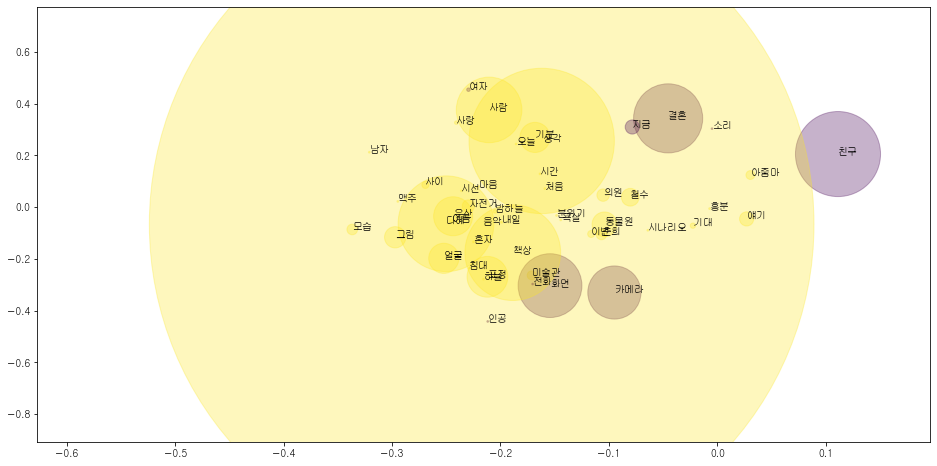

In [17]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.font_manager import FontProperties
import matplotlib.font_manager as fm 

# top50의 단어를 선별하여 word2vec을 계산하고 좌표로 찍어준다. 
font_location = "C:\\Windows\\Fonts\\NGULIM.TTF"
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

valid_words = [hot_key[i] for i in range(0,50) if hot_key[i] in words]
valid_index = [words.index(str_temp) for str_temp in valid_words]   
valid_labels = [labels[i]+1 for i in valid_index]
valid_area = area[[table_words.index(str_temp) for str_temp in valid_words]]   
zip_index = zip(valid_index,valid_words)

plt.figure(figsize=(16, 8))
plt.scatter(result[valid_index, 0], result[valid_index, 1] , c = valid_labels , s = area , alpha=0.3)
for i, word in zip_index:
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    
plt.show()

In [18]:
print(model.similarity('춘희', '철수'))
print(model.similarity('춘희', '인공'))
print(model.similarity('미술관', '동물원'))
print(model.similarity('카페', '차'))
print(model.similarity('친구', '결혼'))
print(model.similarity('여자', '남자'))
print(model.similarity('소리', '생각'))
print(model.similarity('소리', '소리'))

0.9841821
0.9339148
0.9836898
0.9739255
0.99188995
0.97920877
0.99203616
1.0


D:\Users\Yohan\anaconda3\envs\tensorflow_lab\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.
D:\Users\Yohan\anaconda3\envs\tensorflow_lab\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  
D:\Users\Yohan\anaconda3\envs\tensorflow_lab\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Users\Yohan\anaconda3\envs\tensorflow_lab\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  after removing the cwd from